# Name - Arunima Borah
## Task 2 - Prediction using Unsupervised ML (using IRIS dataset)

In [1]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

In [8]:
#Loading the Iris Dataset
iris = "Downloads\Iris.csv"
iris_df = pd.read_csv(iris)
iris_df.head(15) # See the first 15 rows

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


## To determine the optimum numbers of clusters, i.e., the value of K in K-Means clustering
There is a popular method known as elbow method which is used to determine the optimal value of K to perform the K-Means Clustering Algorithm. The basic idea behind this method is that it plots the various values of cost with changing k. 

In [9]:
x = iris_df.iloc[:, [0, 1, 2, 3]].values

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

Visualizing the 'elbow method' by plotting the results onto a line graph

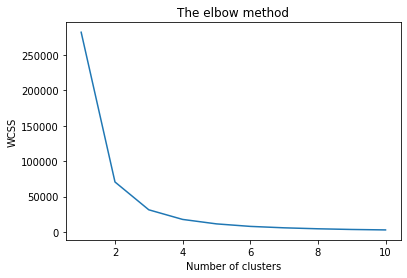

In [10]:
#Plotting the line graph and observe where the 'elbow point' forms
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From this we choose the number of clusters as <b>'3'</b>.

## Instantiating and fitting our K-Means cluster model.
We are going to use three clusters and a random state of 0

In [14]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

## Visualizing the clusters

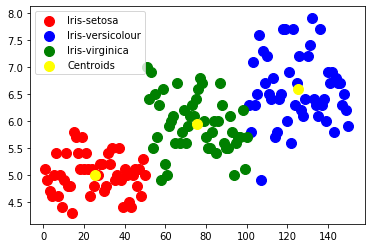

In [15]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

Now let's compare the original data with our clustered results:

Text(0.5, 1.0, 'Predicted')

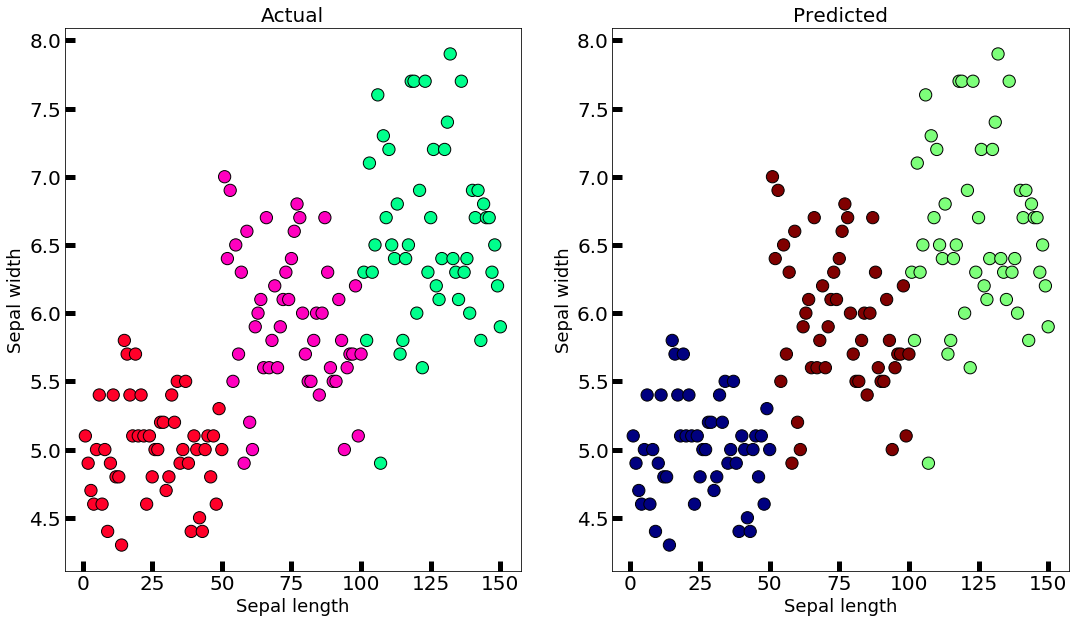

In [25]:
#The following code will tell us to which cluster does the data observations belong

new_labels = kmeans.labels_

#Plot the identified clusters and compare with the results

fig, axes = plt.subplots(1,2, figsize = (18,10))
axes[0].scatter(x[:,0], x[:,1], c=y_kmeans, cmap = 'gist_rainbow', edgecolor = 'k', s = 150)
axes[1].scatter(x[:,0], x[:,1], c=new_labels, cmap = 'jet', edgecolor = 'k', s = 150)
axes[0].set_xlabel('Sepal length', fontsize = 18)
axes[0].set_ylabel('Sepal width', fontsize = 18)
axes[1].set_xlabel('Sepal length', fontsize = 18)
axes[1].set_ylabel('Sepal width', fontsize = 18)
axes[0].tick_params(direction= 'in', length = 10, width = 5, colors = 'k', labelsize = 20)
axes[1].tick_params(direction= 'in', length = 10, width = 5, colors = 'k', labelsize = 20)
axes[0].set_title('Actual', fontsize = 20)
axes[1].set_title('Predicted', fontsize = 20)

## Advantages and Disadvantages of K-Means
### Advantages:
1) K-Means is simple and computationally efficient. 
2) It is very intuitive and their results are easy to visualize.

### Disadvantages:
1) K-Means is highly scale-dependent and is not suitable for data of varying shapes and densities. 
2) Evaluating results is more subjective. It requires much more human evaluation than trusted metrics.

